In [2]:
import numpy as np
import pixiedust

<span style="color: #5F90B6; font-size: 1.5em; font-weight:bold">Load data in a pandas DataFrame</span>

In [3]:
co2 = pixiedust.sampleData(
        "file:///Users/margriet/projects/visualisation-forest/data/co2_weekly_mlo.csv",
        forcePandas = True)

#co2 = pixiedust.sampleData(
#        "https://raw.githubusercontent.com/MargrietGroenendijk/visualisation-forest/master/data/co2_weekly_mlo.csv",
#        forcePandas = True)

Downloaded 115377 bytes
Creating pandas DataFrame for 'file:///Users/margriet/projects/visualisation-forest/data/co2_weekly_mlo.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'file:///Users/margriet/projects/visualisation-forest/data/co2_weekly_mlo.csv'


<span style="color: #5F90B6; font-size: 1.5em; font-weight:bold">Display data in a table and filter rows > 400 ppm</span>

In [4]:
display(co2)

<span style="color: #5F90B6; font-size: 2em; font-weight:bold">Line chart</span>

* matplotlib, bokeh and brunel
* cluster by month
* subplots
* brunel dynamic filter

In [5]:
co2 = co2.replace(-999.99, np.nan)
display(co2)

<span style="color: #5F90B6; font-size: 2em; font-weight:bold">Histogram</span>

In [6]:
forest = pixiedust.sampleData(
        "file:///Users/margriet/projects/visualisation-forest/data/forest_map.csv",
        forcePandas = True)

#forest = pixiedust.sampleData(
#        "https://raw.githubusercontent.com/MargrietGroenendijk/visualisation-forest/master/data/forest_map.csv",
#        forcePandas = True)

forest['forestchange'] = forest['2015'] - forest['1990']

Downloaded 55283 bytes
Creating pandas DataFrame for 'file:///Users/margriet/projects/visualisation-forest/data/forest_map.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'file:///Users/margriet/projects/visualisation-forest/data/forest_map.csv'


In [7]:
forest.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,forestchange
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,2.33,2.33,2.33,2.33,2.33,2.33,...,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,0.00
1,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,2.07,2.07,2.07,2.07,2.07,2.07,...,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,0.00
2,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,48.91,48.81,48.71,48.61,48.51,48.41,...,47.21,47.11,47.01,46.91,46.81,46.71,46.61,46.51,46.41,-2.50
3,Albania,ALB,Forest area (% of land area),AG.LND.FRST.ZS,28.79,28.72,28.65,28.57,28.50,28.43,...,28.47,28.42,28.38,28.33,28.30,28.26,28.23,28.19,28.16,-0.63
4,Andorra,AND,Forest area (% of land area),AG.LND.FRST.ZS,34.04,34.04,34.04,34.04,34.04,34.04,...,34.04,34.04,34.04,34.04,34.04,34.04,34.04,34.04,34.04,0.00


* filter data `2015` > 85%
* bar chart `CountryCode` - `2015`
* renderers
* interactive
* sort values descending

In [8]:
display(forest)

<span style="color: #5F90B6; font-size: 2em; font-weight:bold">Scatter plot</span>


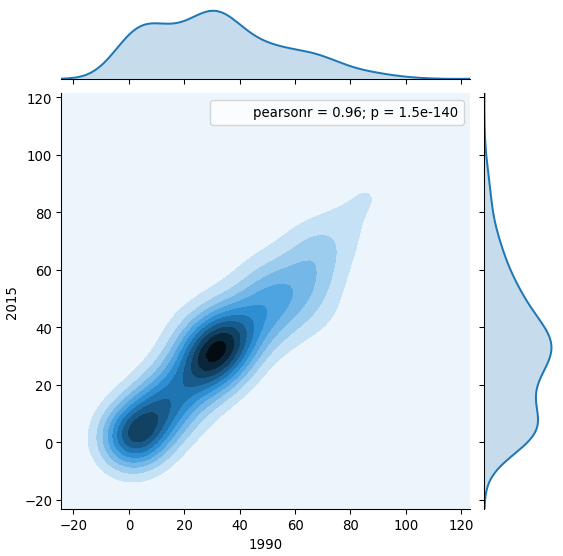

In [9]:
display(forest)

<span style="color: #5F90B6; font-size: 2em; font-weight:bold">Maps</span>

https://data.worldbank.org/indicator/AG.LND.FRST.ZS  

In [10]:
display(forest)

<span style="color: #5F90B6; font-size: 3em; font-weight:bold">PixieDebugger</span>

In [12]:
%%pixie_debugger
import random
def find_max (values):
    max = 0
    for val in values:
        if val > max:
            max = val
    return max
find_max(random.sample(range(100), 10))

In [14]:
def bad_method(div):
    print(10/div)
bad_method(0)

ZeroDivisionError: division by zero

In [15]:
%pixie_debugger

<span style="color: #5F90B6; font-size: 3em; font-weight:bold">PixieApps</span>

From: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/f77040d3-7f93-4949-92b3-a95fb2483e39/view?access_token=0f0f548e313822d45e980005da7d7f79ade2487354aa35615b8de93c2fe52f23

This PixieApp returns a Jinja2 template, which is rendered into HTML, CSS and JavaScript.

In [16]:
from pixiedust.display.app import *

In [17]:
@PixieApp
class SimpleApp1():
    @route()
    def main(self):
        return """
            <h1>SimpleApp 1</h1>
            
            <input type="button" value="Click Me">
        """

SimpleApp1().run(runInDialog='false')

In [18]:
@PixieApp
class SimpleApp2():
    @route()
    def main(self):
        return """
            <h1>SimpleApp 2</h1>
            
            <input pd_options="clicked=true" type="button" value="Click Me">
        """
    @route(clicked="true")
    def _clicked(self):
        return """
            <input pd_options="clicked=false" type="button" value="You Clicked, Now Go back">
        """
    
SimpleApp2().run(runInDialog='false')

In [19]:
from pixiedust.display.datahandler import getDataHandler

@PixieApp
class DataFrameDisplayApp():
    # setup get called upon instantiation of the class
    def setup(self):
        self.df = self.pixieapp_entity
        # should add a check here for Pandas vs. Spark...
        self.cols = self.df.columns # this is how we get column names in Pandas
    
    @route()
    @templateArgs # this allows us to use python variables in our Jinja template
    def main(self):
        return """
            <h1>DataFrameDisplayApp</h1>
            
            <div class="panel panel-default">
              <div class="panel-heading">
                <h3 class="panel-title">Select a column</h3>
              </div>
              <div class="panel-body">
                <select id="columnselect{{prefix}}" pd_entity pd_options="handlerId=histogram;rendererId=bokeh;valueFields=$val(columnselect{{prefix}});bins=10;rowCount=5000;chartsize=40;legend=true;" pd_target="column-output-{{prefix}}" class="form-control">
                    <option value="---">---</option>
                    {%for col in this.cols%}
                    <option value="{{col}}">{{col}}</option>
                    {%endfor%}
                </select>
                <br/>
                <div id="column-output-{{prefix}}">nothing important here...</div>
              </div>
            </div>
        """
    
DataFrameDisplayApp().run(forest, runInDialog='false')

<span style="color: #5F90B6; font-size: 2em; font-weight:bold">Key concepts</span>

* **{{prefix}}**: a unique id for each cell that prevents conflicts in the same app appearing more than once in the notebook
* **pd_options**: parameters passed to the app when an action occurs (these parameters bind to a route)
* **$val**: the value returned from an HTML form control (NOTE: dashes not allowed in element id)
* **pd_target**: the unique ID of the HTML element where the response will be written


* **pd_entity**: passes the apps DataFrame to the display handler
* **handlerId**: the unique ID of the PixieDust data handler
* **rendererId**: the unique ID of the data handler's renderer (defaults to maplotlib)